In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:

import matplotlib.pyplot as plt

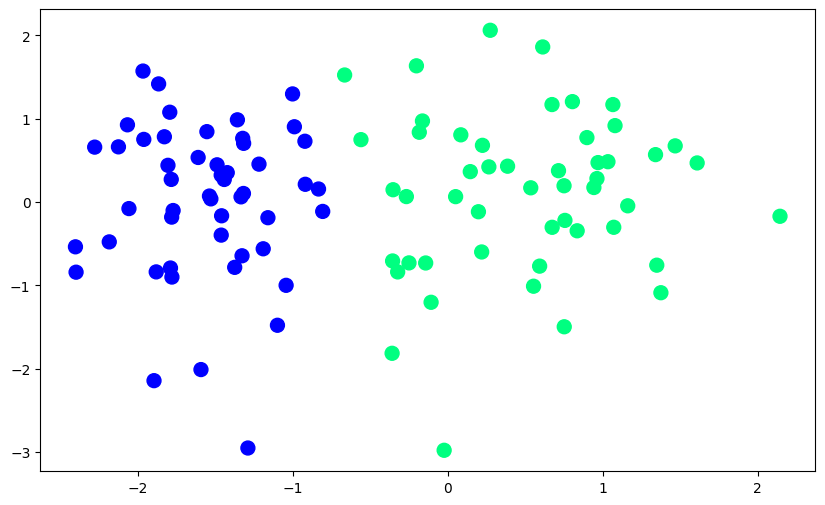

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [5]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    # w0,w1,w2 with 1 value or coeffienct
    weights = np.ones(X.shape[1])
    # learnig rate
    lr=0.1
    for i in range(1000):
        # randomly select one row form X
        j = np.random.randint(0,100)
        
        # predict value or y_hat
        y_hat = step(np.dot(X[j],weights)) # creat the step name funcion
        
        # change the value of weigth or coefficient
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [6]:
# check that value is positive or negtive
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(intercept_)

1.0


In [9]:
coef_

array([1.34671903, 0.02254928])

In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

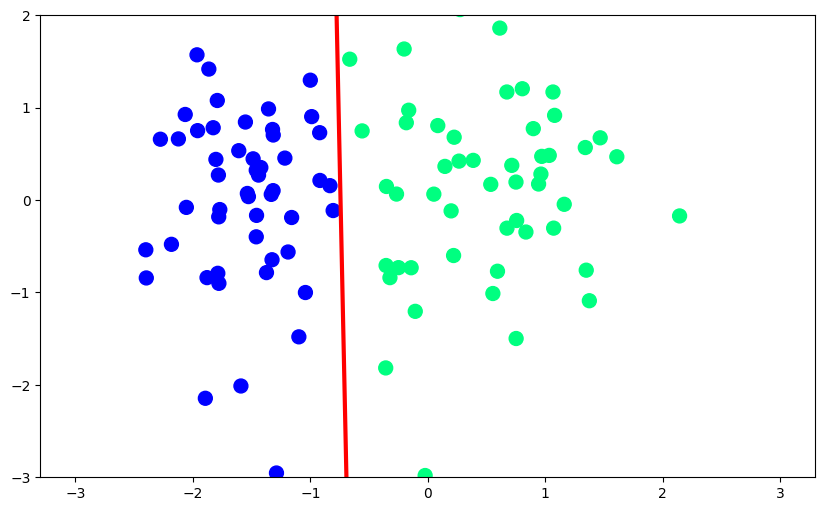

In [12]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [13]:

def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [14]:

m,b = perceptron(X,y)

In [15]:

%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


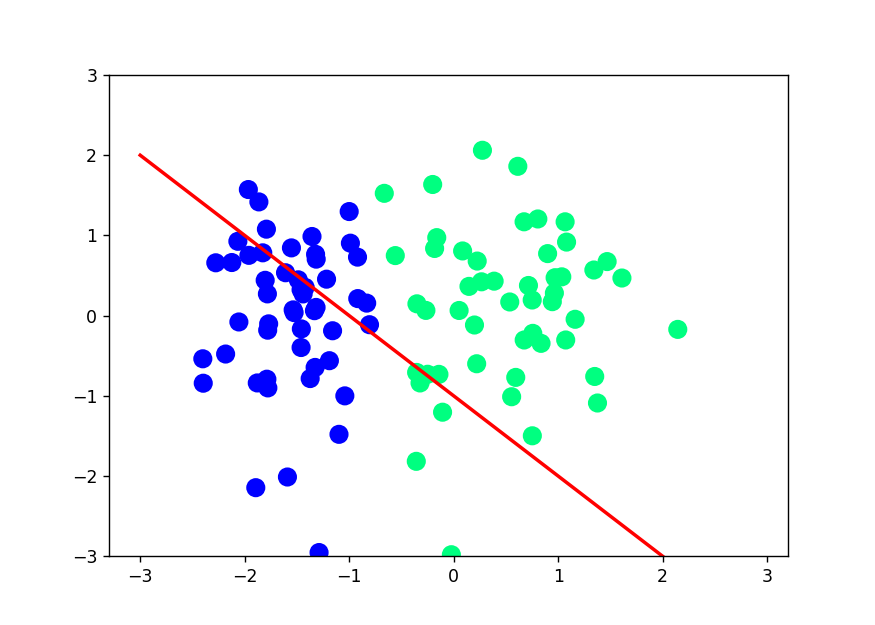

In [16]:
fig, ax = plt.subplots(figsize=(7,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [17]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [18]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [19]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b


<IPython.core.display.Javascript object>


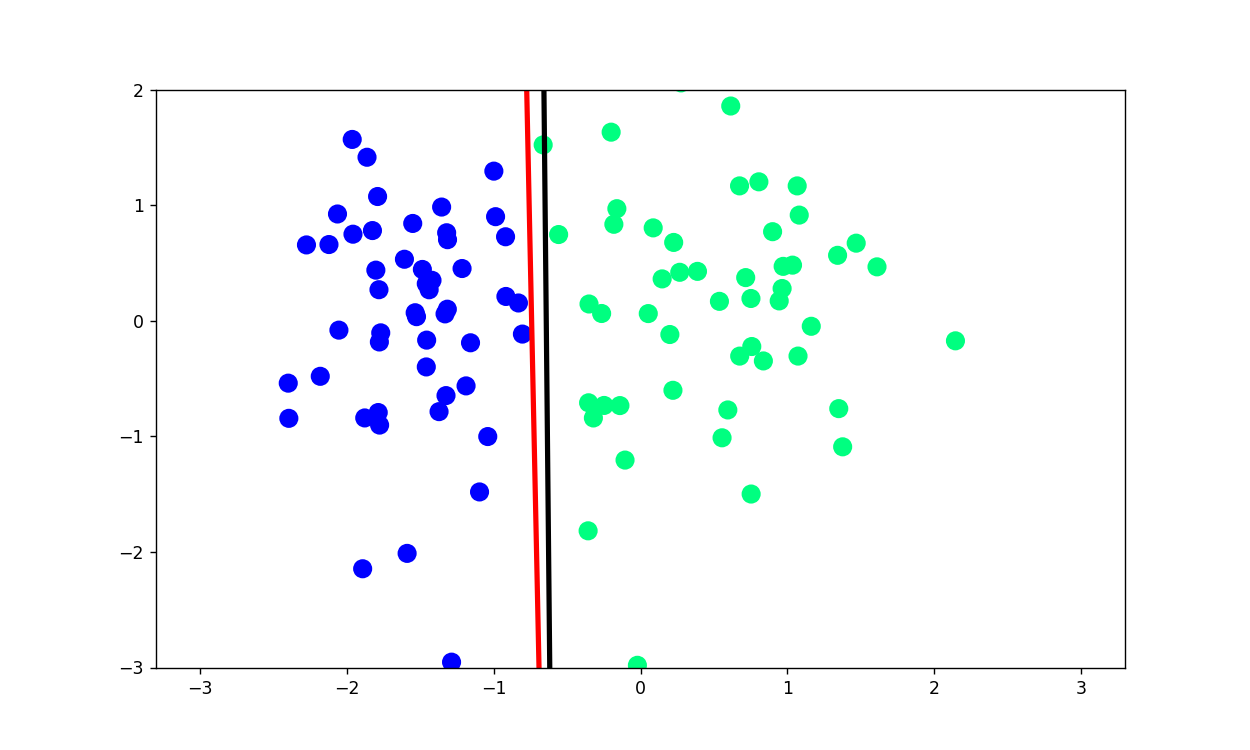

(-3.0, 2.0)

In [20]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) # perceptron
plt.plot(x_input1,y_input1,color='black',linewidth=3) # using logistic regression
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# problem in perceptron
perceptron does not give the best line but logistic regression give the best line 

In [21]:
# using class_sep paramerter to increase the distance

In [39]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

<IPython.core.display.Javascript object>


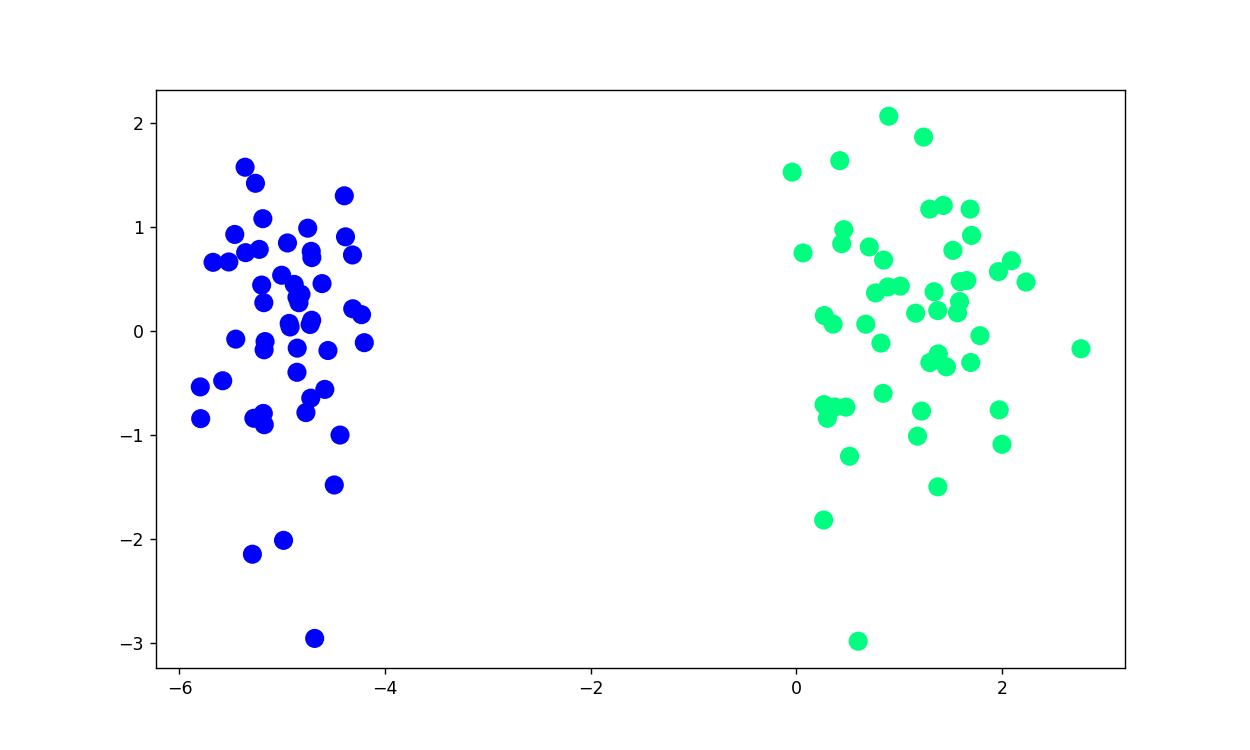

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [41]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    # w0,w1,w2 with 1 value or coeffienct
    weights = np.ones(X.shape[1])
    # learnig rate
    lr=0.1
    for i in range(1000):
        # randomly select one row form X
        j = np.random.randint(0,100)
        
        # predict value or y_hat
        y_hat = step(np.dot(X[j],weights)) # creat the step name funcion
        # change the value of weigth or coefficient
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]
#check that value is positive or negtive
def step(z):
    return 1 if z>0 else 0

In [42]:
intercept_,coef_ = perceptron(X,y)

<IPython.core.display.Javascript object>


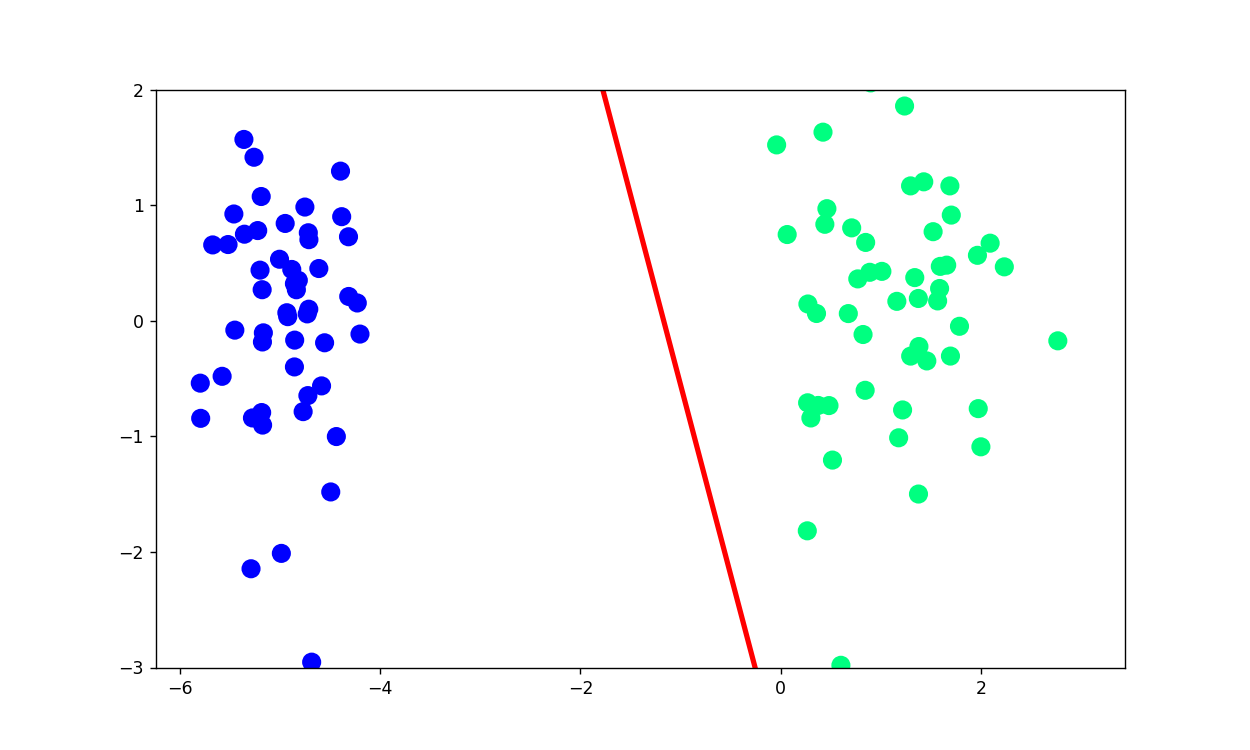

(-3.0, 2.0)

In [43]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [44]:
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

<IPython.core.display.Javascript object>


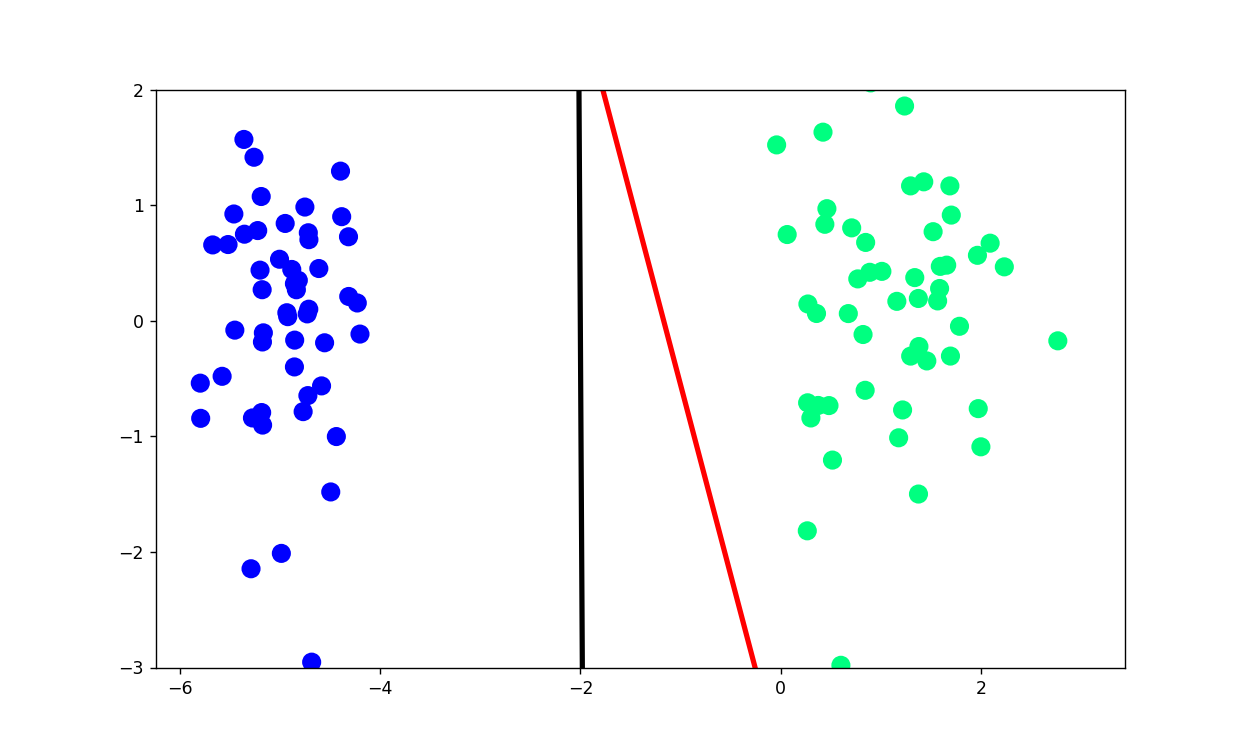

(-3.0, 2.0)

In [45]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) # perceptron
plt.plot(x_input1,y_input1,color='black',linewidth=3) # using logistic regression
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Perceptron using Sigmoid function
z=1/(1+e^-x)

In [51]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    # w0,w1,w2 with 1 value or coeffienct
    weights = np.ones(X.shape[1])
    # learnig rate
    lr=0.1
    for i in range(1000):
        # randomly select one row form X
        j = np.random.randint(0,100)
        
        # predict value or y_hat
        y_hat = step(np.dot(X[j],weights)) # creat the step name funcion
        # change the value of weigth or coefficient
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]
#check that value is positive or negtive
def step(z):
    return 1/(1+pow(2.71,-z))

In [52]:
intercept_,coef_ = perceptron(X,y)

<IPython.core.display.Javascript object>


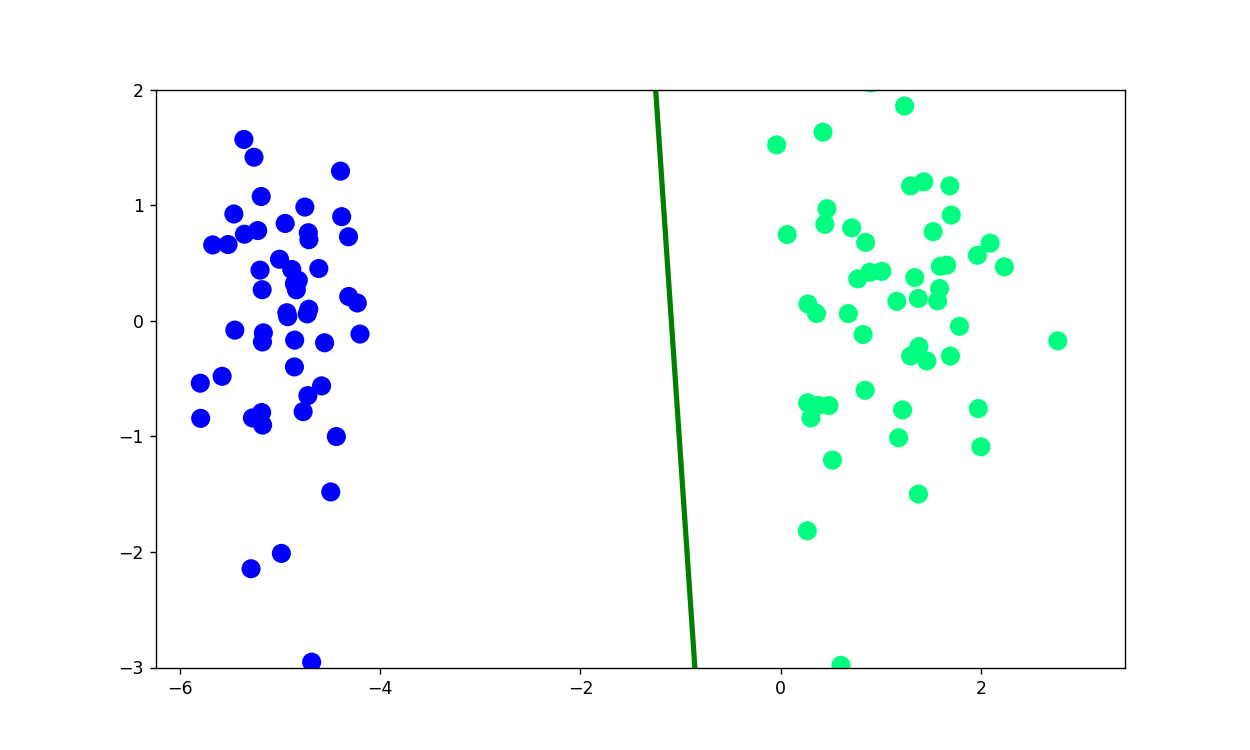

(-3.0, 2.0)

In [53]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input_2 = np.linspace(-3,3,100)
y_input_2 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input_2,y_input_2,color='green',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
# comparision with all three solution
# best is sklearn.logistic solution

<IPython.core.display.Javascript object>


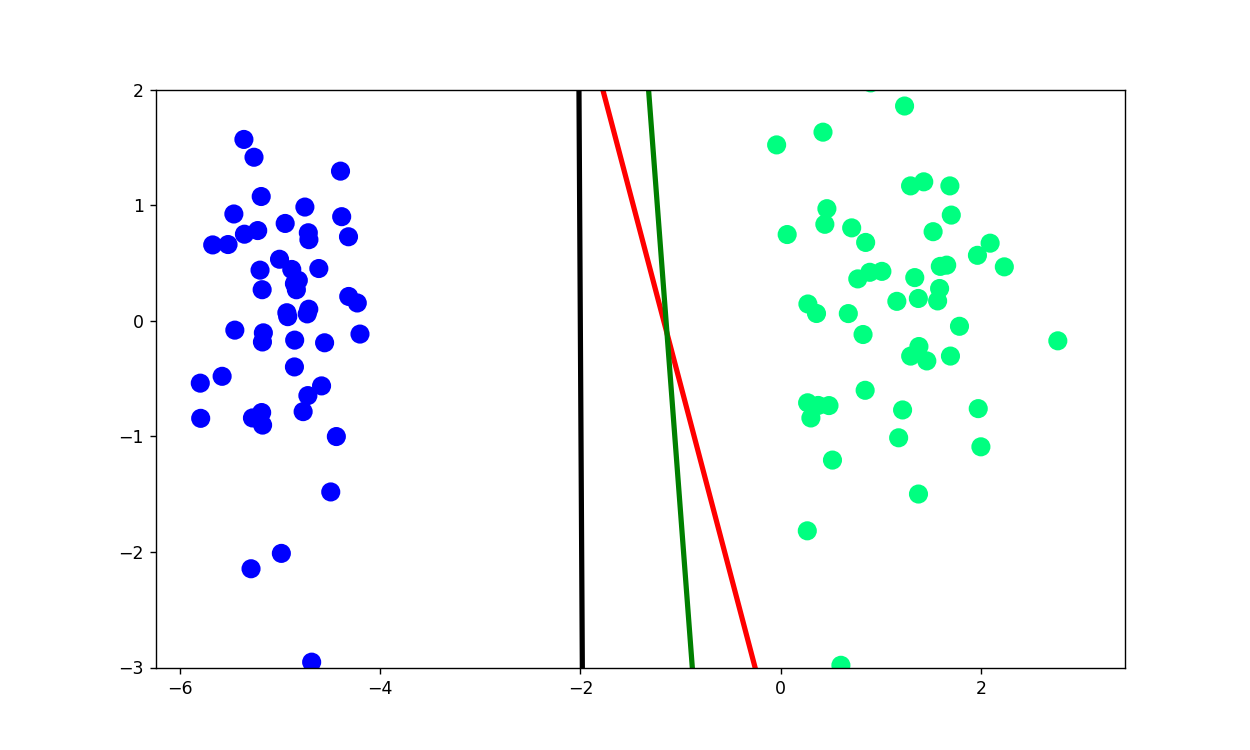

(-3.0, 2.0)

In [49]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) # perceptron
plt.plot(x_input1,y_input1,color='black',linewidth=3) # using logistic regression
plt.plot(x_input_2,y_input_2,color='green',linewidth=3) # using sigmoid fucntion
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)